Importing required Lbraries

In [195]:
import pandas as pd
import numpy as np
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

Reading the data file

In [137]:
#reading data
data=pd.read_csv(r"C:\Users\Prema\OneDrive - Corestrat Labs\Desktop\PS_20174392719_1491204439457_log.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [78]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [138]:
#droping data columns such as names
data.drop(columns=['nameOrig', 'nameDest'], inplace=True)

In [139]:
data.rename(columns = {'newbalanceOrig' : 'Balance_Post_Transaction', 'oldbalanceOrg' : 'Balance_Pre_Transaction', 'step' : 'Time_Transaction_Hours'
                      , 'amount': 'Amount' , 'type' : 'Nature_Transaction' , 'oldbalanceDest' : 'Transferred_Pre_Trans' ,
                       'newbalanceDest' : 'Transferred_Post_Trans' , 'isFraud' : 'Fraud' , 'isFlaggedFraud' : 'FlagasFraud'}, inplace =True)

EDA

In [9]:
binned_data=pd.DataFrame()

In [10]:
binned_data['Fraud']=data['Fraud']

In [11]:
#function to create bins
def Binner(x,y):
        nam=x.name
        mi=x.min()
        z=x.max()
        w=z/y
        bins=[]
        labels=[]
        for n in range(y):
            step=mi+n*w
            stop=z
            bins.append(int(step))
            labels.append(n)
        bins.append(int(stop))
        name=nam+'_'+'Binned'
        binned_data[name] = pd.cut(x = x, bins = bins, labels = labels, include_lowest = True)

In [12]:
#creating bins for all the variables in the dataframe
Binner(data['Time_Transaction_Hours'],4)
Binner(data['Amount'],4)
Binner(data['Balance_Pre_Transaction'],4)
Binner(data['Balance_Post_Transaction'],4)
Binner(data['Transferred_Pre_Trans'],4)
Binner(data['Transferred_Post_Trans'],4)

In [47]:
#creating a definition for plotting the plots
def plotter(y):
    plt.figure()
    title=y+'_vs_'+'Fraud'
    ax=sns.countplot(x=binned_data[y],hue=binned_data['Fraud'])
    ax.set_title(title)
    for x in ax.containers:
        ax.bar_label(x)

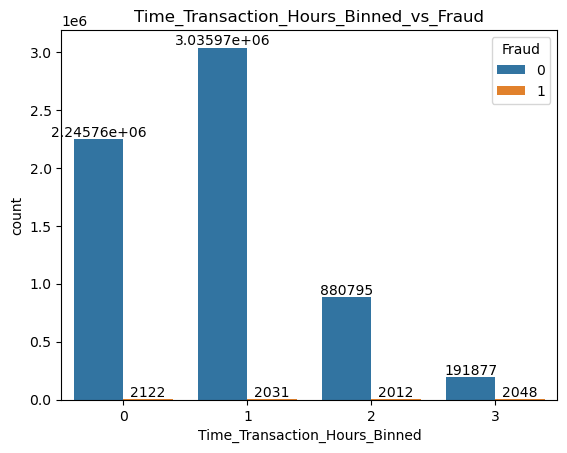

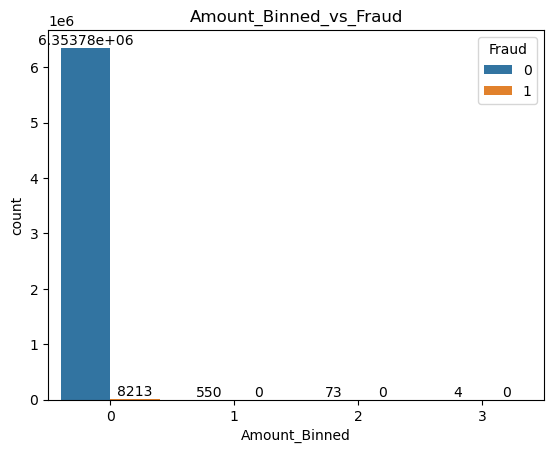

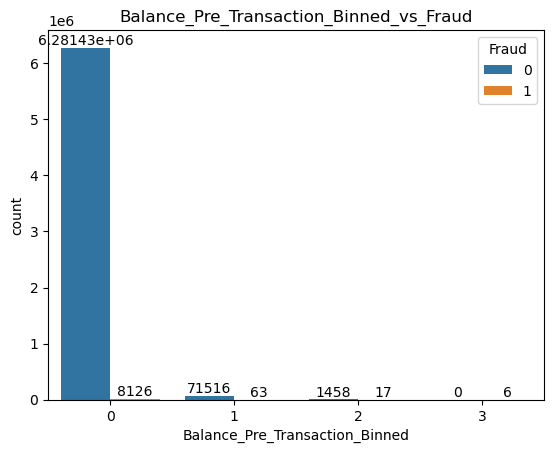

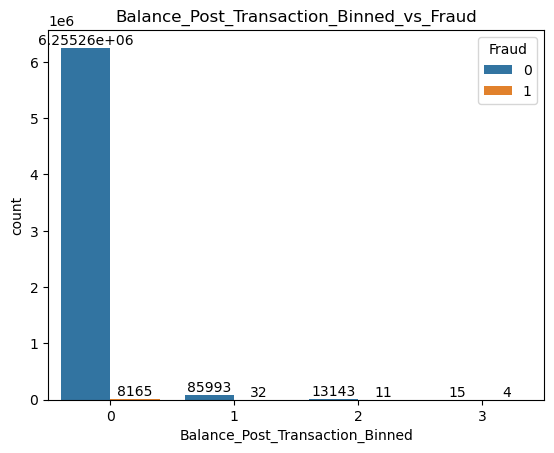

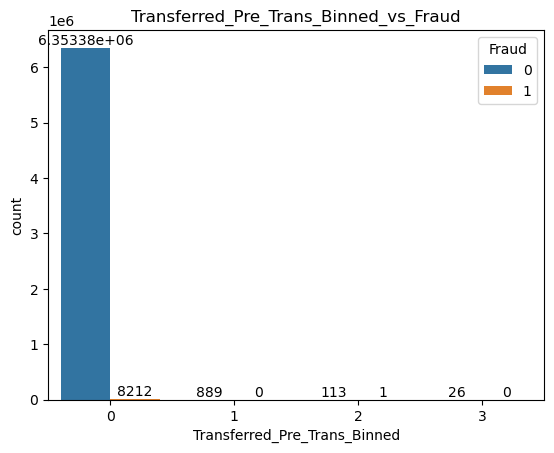

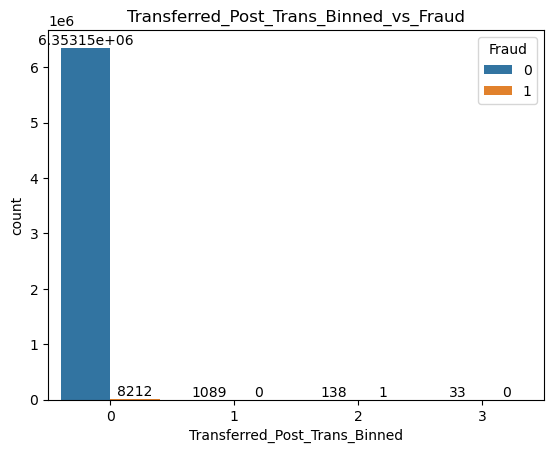

In [50]:
for col in binned_data.iloc[:,1:].columns:
    plotter(col)

C:\Users\Prema\AppData\Local\Temp\ipykernel_29988\1408005005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,annot_kws={"fontsize":8}, fmt='.2f')


<Axes: >

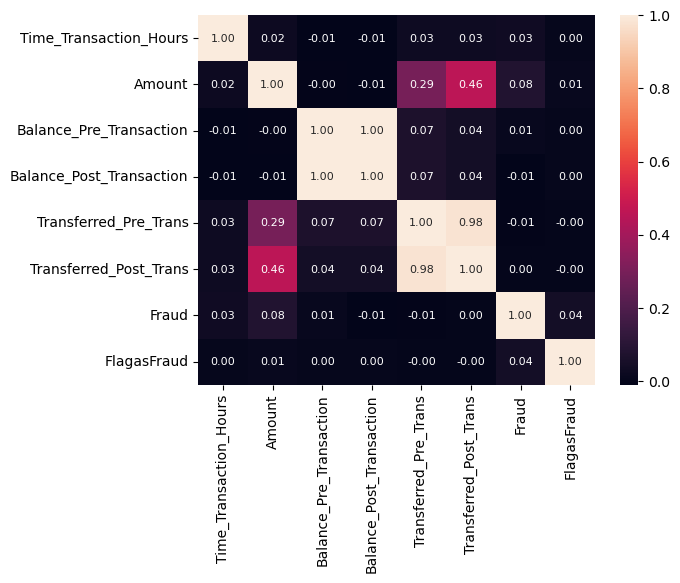

In [20]:
sns.heatmap(data.corr(), annot=True,annot_kws={"fontsize":8}, fmt='.2f')

In [119]:
data.groupby(['Fraud']).mean()

C:\Users\jubin\AppData\Local\Temp\ipykernel_20600\696026184.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Fraud']).mean()


,Time_Transaction_Hours,Amount,Balance_Pre_Transaction,Balance_Post_Transaction,Transferred_Pre_Trans,Transferred_Post_Trans,FlagasFraud
Fraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


Univariate Analysis (Box Plots)

In [37]:
def box_plotter(y):
    plt.figure()
    title=y+'_Box_Plot'
    ax=sns.boxplot(x=data[y])
    ax.set_title(title)

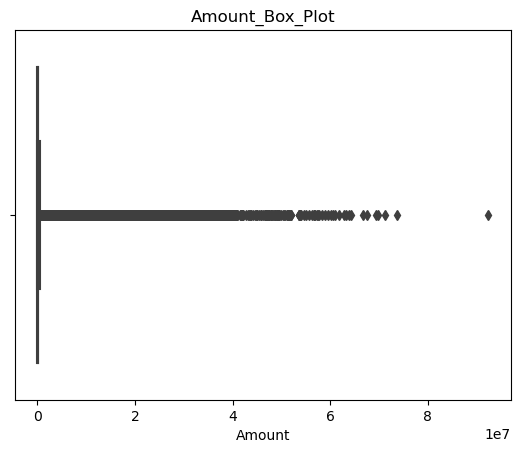

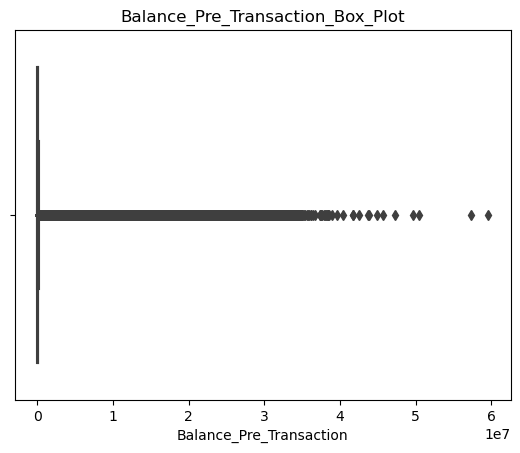

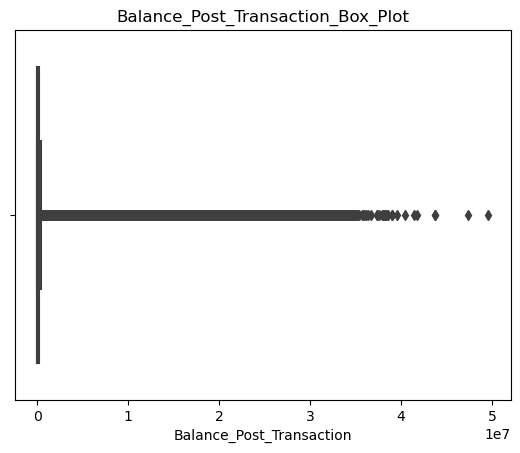

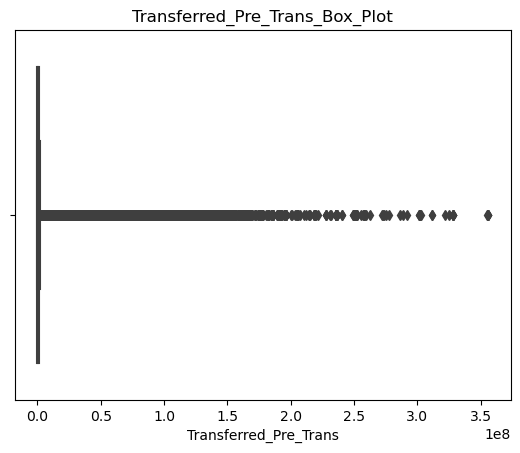

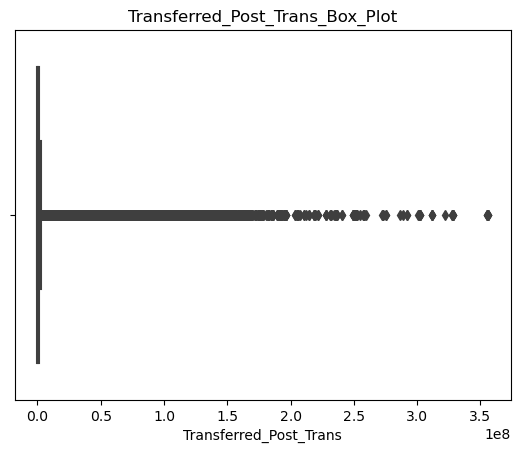

In [38]:
for x in data.iloc[:,2:7].columns:
    box_plotter(x)

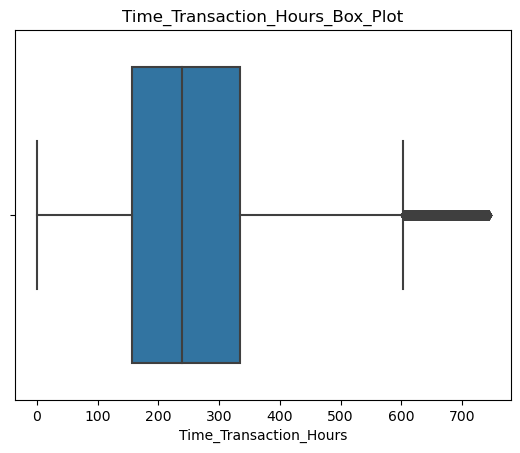

In [41]:
box_plotter('Time_Transaction_Hours')

Univariate Analysis (Violin Plots)

In [44]:
def vio_plotter(y):
    plt.figure()
    title=y+'_Violin_Plot'
    ax=sns.violinplot(x=data[y])
    ax.set_title(title)

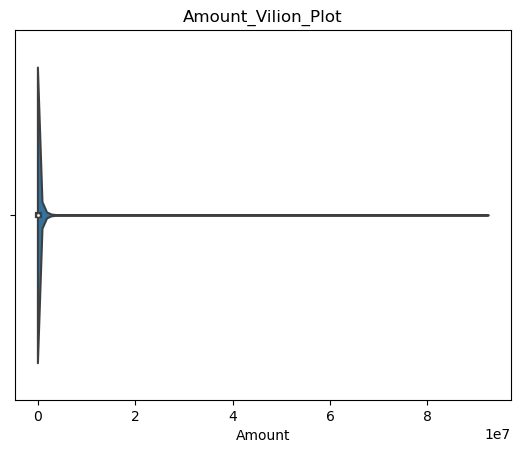

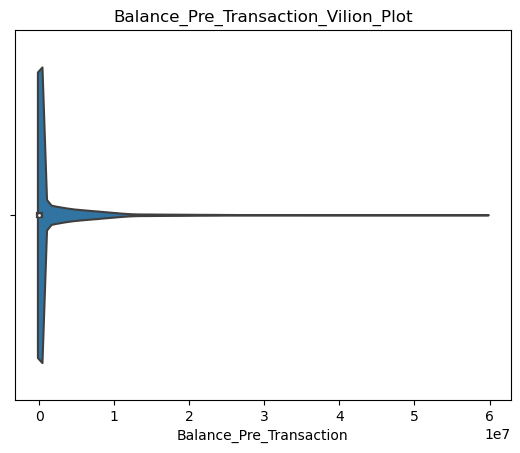

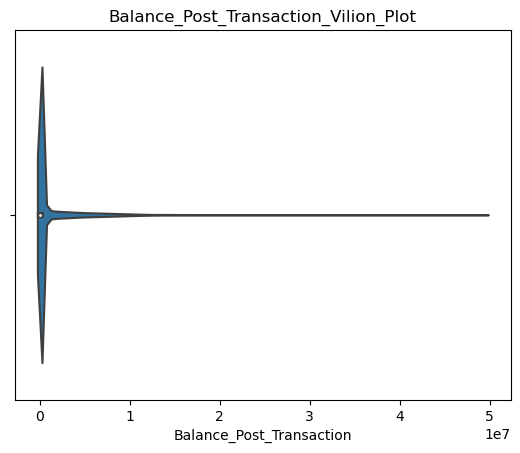

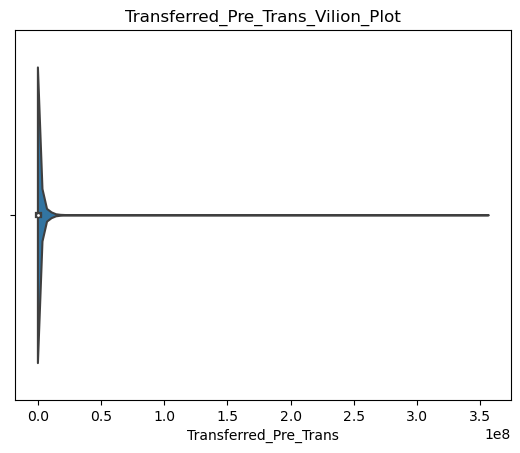

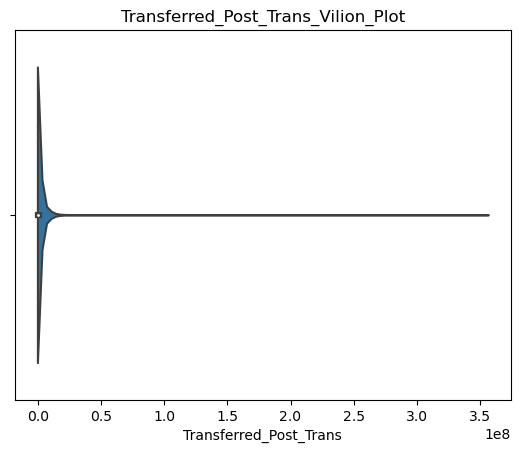

In [45]:
for x in data.iloc[:,2:7].columns:
    vio_plotter(x)

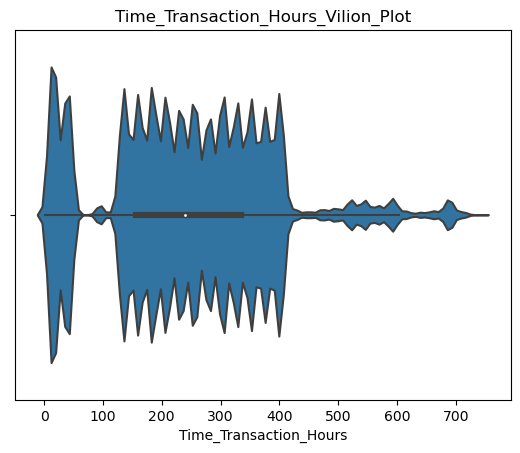

In [46]:
vio_plotter('Time_Transaction_Hours')

Feature Engineering

In [140]:
#a feature showing how much moeny was transfered to the transferee account
data['Money_Trans_TheftAC'] = np.abs(data['Transferred_Post_Trans'] - data['Transferred_Pre_Trans'])

In [141]:
#a feature showing how much moeny was transfered to the transferee account given the time for the transaction
data['Amount_to_TimeforTranser']=round(data['Amount'] /data['Time_Transaction_Hours'])

C:\Users\Prema\AppData\Local\Temp\ipykernel_29988\1408005005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,annot_kws={"fontsize":8}, fmt='.2f')


<Axes: >

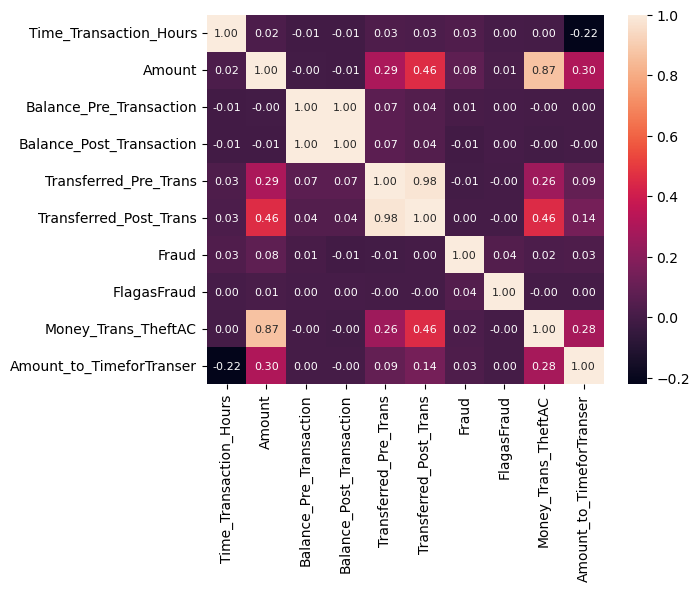

In [142]:
sns.heatmap(data.corr(), annot=True,annot_kws={"fontsize":8}, fmt='.2f')

Preparing data for the model (Standardization and Transformation)

In [143]:
def increment_1(col):
    data[col]=data[col].apply(lambda x:x+1)

In [144]:
for column in data.iloc[:,2:7].columns:
    increment_1(column)
increment_1('Money_Trans_TheftAC')

In [145]:
def log_trans(col):
    data[col]=data[col].apply(lambda x:np.log(x))

In [146]:
for column in data.iloc[:,2:7].columns:
    log_trans(column)
log_trans('Money_Trans_TheftAC')

In [148]:
y=data['Fraud']
data.drop(columns=['Fraud'],inplace=True)

In [149]:
data_num=pd.concat([data.iloc[:,:1],data.iloc[:,2:7],data.iloc[:,8:]], axis=1)

In [150]:
data_num.fillna(0, inplace=True)

In [151]:
# import module
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data_num)
scaled_data_num=model.transform(data_num)

array([[0.00000000e+00, 5.01265448e-01, 6.72759670e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.60566377e-03],
       [0.00000000e+00, 4.10593886e-01, 5.56563672e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.93593218e-04],
       [0.00000000e+00, 2.83718776e-01, 2.90679292e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.79293844e-05],
       ...,
       [1.00000000e+00, 8.53656019e-01, 8.74598891e-01, ...,
        7.95729359e-01, 8.47470739e-01, 2.24923862e-03],
       [1.00000000e+00, 7.44351705e-01, 7.62612998e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.02934894e-04],
       [1.00000000e+00, 7.44351705e-01, 7.62612998e-01, ...,
        8.02987598e-01, 7.38958404e-01, 3.02934894e-04]])

In [156]:
scaled_data_num=pd.DataFrame(scaled_data_num,columns=data_num.columns)

In [152]:
data_en_cat=pd.get_dummies(data=data['Nature_Transaction'], drop_first=True)

In [158]:
X=pd.concat([data_en_cat,scaled_data_num,data['FlagasFraud']], axis=1)

Model Building

In [178]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_Smote, y_Smote = oversample.fit_resample(X, y)

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Smote,y_Smote,random_state=1,test_size=.25)

In [184]:
lr=LogisticRegression(solver='lbfgs', max_iter=3000)
model=lr.fit(X_train,y_train)

In [185]:
y_pred=model.predict(X_test)

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98   1587995
           1       0.96      0.99      0.98   1589209

    accuracy                           0.98   3177204
   macro avg       0.98      0.98      0.98   3177204
weighted avg       0.98      0.98      0.98   3177204



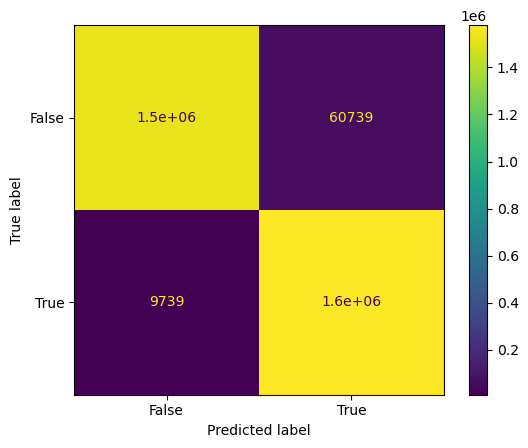

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

<Axes: ylabel='Feature'>

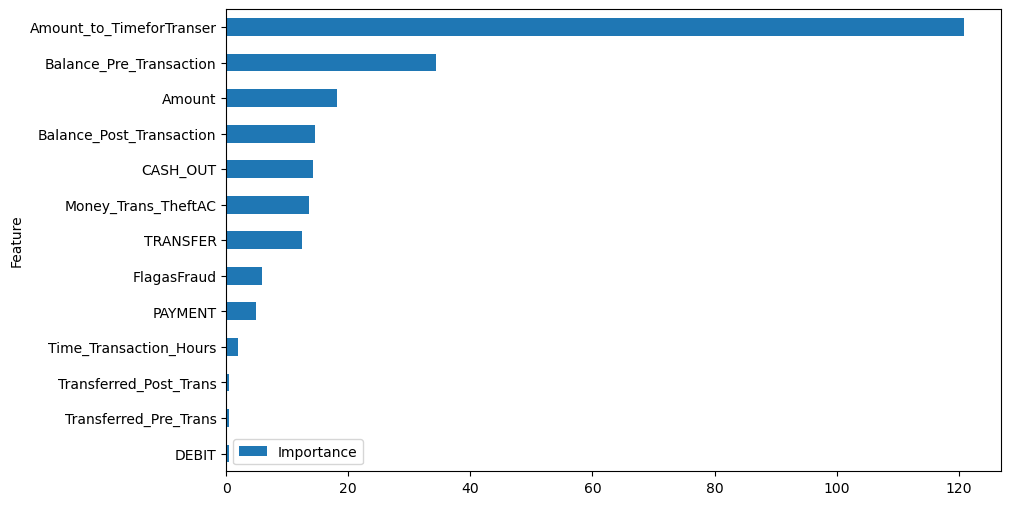

In [190]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Though the model has an overall good accracy, there were 9739 fraududlent entries that the model flagged as not fraud. This is where the model need to improve the most. We need to create more features and we can even use the names of the account holders in the model with observable patterns. 